<a href="https://colab.research.google.com/github/crweber9874/APL/blob/data/Anti_Democratic_Attitudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data 
We test the potential "winner effects" on public support for different forms of election contestation using data from the 2020 presidential election. The U.S. case is particularly interesting because past research suggests that support for democratic norms should be more hardened in established democracies \citep{AndersenGuillory1997}. Thus, we would expect attenuated winner effects in the U.S. relative to newer democracies. Moreover, the 2020 election raised a host of issues about legitimacy of various forms of election contestation with citizens on all sides of the political spectrum concerned about electoral fraud, coups, and other attempts to circumvent electoral processes. 

Data from this study derive from the 2020 Western States Survey. The survey consists of 3,600 respondents from the states of Arizona, Colorado, New Mexico, Nevada, and Utah conducted by YouGov. The data contain an oversample of 600 Latinos. Respondents were matched on gender, age, race, and education using the 2018 American Community Survey (see appendix for details). 

Of particular interest for this study is that respondents were interviewed between October 25, 2020 and November 9, 2020. This includes nine days prior to election day on November 3, 2020,three days after election day before any major media sources called the election for former Vice-President Biden, and and three days after the call for the election. Thus, we are able to compare matched respondents in these three periods to estimate how the timing of the election---and likely resulting perceptions of winning or losing the election---are associated with support for election contestation behaviors. 

## Dependent variables
We measure approval of electoral contestation behaviors with the following question battery that captures some of the most prominent ways elections are contested. 
Respondents were asked, 

**Many people are unhappy with the outcomes of elections. How much do you support or oppose each of the following behaviors when people are unhappy with the outcome of an election?**

$\bullet$ Attend a march or demonstration [, even if it might turn chaotic or dangerous] 

$\bullet$ Publicly criticize the integrity or fairness of the election [on social media]

$\bullet$  Burn the American flag 

$\bullet$ Support ballot recounts

$\bullet$ Contest the outcome in the courts


In [9]:
# # The stuff below is to run in colab; otherwise, just install packages on your machine.
# system("apt-get install -y libv8-dev")
# system("apt-get install r-base-dev xml2 libxml2-dev libssl-dev libcurl4-openssl-dev unixodbc-dev")
# if (!require(devtools)) {
#   install.packages("devtools")
#   library(devtools)
# }
# #devtools::install_github("stan-dev/rstanarm", build_vignettes = FALSE)
# devtools::install_github("paul-buerkner/brms", build_vignettes = FALSE)
# devtools::install_github("malcolmbarrett/ggdag", build_vignettes = FALSE)
# install.packages("lavaan")
# install.packages("psych")
# install.packages("dplyr")
# install.packages("car")
# install.packages("FindIt")
# library('lavaan')
# library('car')


# Load data

Below I include the code to recode much of the data. Just run the cell below. It will also display a bunch of alpha measures for scales created from the psychology items (e.g., authoritariansm, racial resentment, and so forth). You can also copy the notebook and run on your end. You'll need to install all the packages and dependencies. This is a bit challenging (I had to run it using the hidden code above); otherwise, we can just all edit and modify the code in my account. There should be a track change option. 

In [14]:
#@title Load Packages and Recode Data
#install.packages("lavaan")
#install.packages("psych")
#install.packages("dplyr")
#install.packages("car")
#install.packages("FindIt")
library(dplyr)
library(lavaan)
library(psych)
#detach("package:car")
df = read.csv("https://raw.githubusercontent.com/crweber9874/research/master/western.csv", 
              header = TRUE)
### Misc Recodes
state_list = c("Washington", "Oregon", "California", 
         "Idaho", "Utah", "Nevada", "Arizona",
         "New Mexico", "Colorado", "Wyoming", 
         "Montana", "Texas", "Oklahoma", "Kansas",
         "Sonora, Mexico", "Chihuaha, Mexico", 
         "Coahila, Mexico", "British Columbia, Canada",
         "Alberta, Canada")

region_list = c("West", "Southwest", "Northwest", 
           "West Coast", "Intermountain West",
          "Rocky Mountains", "Other")

state = ifelse(df$WSS01_1 == "selected", "Washington", NA) 
region = ifelse(df$WSS01_b_1 == "selected", "West", NA) 

opt = paste0("WSS01_", c(2:19))
for (i in 1:length(opt)){
    state = ifelse(df[, opt[i]] == "selected", state_list[i+1] , state) 
}

opt = paste0("WSS01_b_", c(2:7))
for (i in 1:length(opt)){
    region = ifelse(df[, opt[i]] == "selected", region_list[i+1] , region) 
}

df$vote1 <- car::recode(as.numeric(df$WSS36_b), "1=1 ; 2=0; else=NA")
df$vote2 <- car::recode(as.numeric(df$WSS36_c), "1=1 ; 2=0; else=NA")
df$voted <- ifelse(is.na(df$WSS36_b), df$vote2, df$vote1)
            
df$state = state
df$region = region

# Is state_residents the same as inputstate -- not in codebook

# `1`= 5, `2`= 4,`3`= 3, `4`= 2, `5`= 1
# `1`= 1, `2`= 2,`3`= 3, `4`= 4, `5`= 5

agree_key <- list(`1`= 5, `2`= 4,`3`= 3, `4`= 2, `5`= 1)
disagree_key <- list(`1`= 5, `2`= 4,`3`= 3, `4`= 2, `5`= 1)

df =  df %>%
       mutate(state  =  state) %>%
       mutate(region =  region) %>%
       mutate(state_residence =  inputstate) %>%
       mutate(state_insult    = recode(as.numeric(WSS02_1), !!!agree_key)) %>%
       mutate(state_common    = recode(as.numeric(WSS02_2), !!!agree_key)) %>%
       mutate(state_interest  = recode(as.numeric(WSS02_3), !!!agree_key)) %>% 
       mutate(state_we        = recode(as.numeric(WSS02_4), !!!agree_key)) %>%
       mutate(state_partme    = recode(as.numeric(WSS02_5), !!!agree_key)) %>%
       mutate(state_proud     = recode(as.numeric(WSS02_6), !!!agree_key)) %>%
       mutate(state_identity_identity_strength = state) %>%
       mutate(moral_ind1      = recode(as.numeric(WSS09_b_1), !!!agree_key)) %>%
       mutate(moral_ind2      = recode(as.numeric(WSS09_b_2), !!!agree_key)) %>%
       mutate(moral_ind3      = recode(as.numeric(WSS09_b_3), !!!agree_key)) %>%
       mutate(moral_ind4      = recode(as.numeric(WSS09_b_4), !!!agree_key)) %>%
       mutate(moral_group     = recode(as.numeric(WSS09), `1`= "Religious Leader", `2`= "Science",`3`= "Teacher", `4`= "Public", `5`= "Family")) %>%
       mutate(sdo1            = recode(as.numeric(WSS10_1), !!!agree_key)) %>%
       mutate(sdo2r           = recode(as.numeric(WSS10_2), !!!disagree_key))  %>%
       mutate(sdo3            = recode(as.numeric(WSS10_3), !!!agree_key))  %>%
       mutate(sdo4r           = recode(as.numeric(WSS10_4), !!!disagree_key))  %>%
       mutate(rr1             = recode(as.numeric(WSS11_1), !!!agree_key)) %>%
       mutate(rr2r            = recode(as.numeric(WSS11_2), !!!disagree_key))  %>%
       mutate(rr3r            = recode(as.numeric(WSS11_3), !!!disagree_key))  %>%
       mutate(rr4             = recode(as.numeric(WSS11_4), !!!agree_key)) %>%
       mutate(emp1            = recode(as.numeric(WSS12_1), !!!agree_key)) %>%
       mutate(emp2            = recode(as.numeric(WSS12_2), !!!agree_key)) %>%
       mutate(emp3            = recode(as.numeric(WSS12_3), !!!agree_key)) %>%
       mutate(emp4            = recode(as.numeric(WSS12_4), !!!agree_key)) %>%
       mutate(ind1            = recode(as.numeric(WSS13_1), !!!agree_key)) %>%
       mutate(ind2r           = recode(as.numeric(WSS13_2), !!!disagree_key)) %>%
       mutate(ind3            = recode(as.numeric(WSS13_3), !!!agree_key)) %>%
       mutate(ind4r           = recode(as.numeric(WSS13_4), !!!disagree_key)) %>%
       # The fifth one doesn't have text.
       mutate(ind5r           = recode(as.numeric(WSS13_6), !!!disagree_key)) %>%
       mutate(anxiety         = recode(as.numeric(WSS14_1), !!!disagree_key)) %>%
       mutate(anger           = recode(as.numeric(WSS14_2), !!!disagree_key)) %>%
       mutate(hope            = recode(as.numeric(WSS14_3), !!!disagree_key)) %>%
       mutate(pride           = recode(as.numeric(WSS14_4), !!!disagree_key)) %>%
       mutate(disgust         = recode(as.numeric(WSS14_5), !!!disagree_key)) %>%
       mutate(enthusiasm      = recode(as.numeric(WSS14_6), !!!disagree_key)) %>%
       mutate(urban_r1        = recode(as.numeric(WSS31_1), !!!agree_key)) %>%
       mutate(urban_r3        = recode(as.numeric(WSS31_2), !!!agree_key)) %>%
       mutate(urban_r3        = recode(as.numeric(WSS31_3), !!!agree_key)) %>%
       mutate(urban_r4        = recode(as.numeric(WSS31_4), !!!agree_key)) %>%
       mutate(trump_vote      = voted) %>%
       mutate(age             = 2020 - birthyr) %>%
       mutate(gen             = car::recode(age, "18:39 = 'Millenial'; 40:59 = 'Gen X'; 60:80 = 'Boomer'; 80:92 = 'Greatest'" )) %>%
       mutate(female          = recode(as.numeric(gender), `1`=0, `2`=1)) %>%
       mutate(white           = car::recode(as.numeric(race),  "1=1 ;  2:8=0"))  %>%
       mutate(latino          = car::recode(as.numeric(race), "3=1;  1:2=0; 4:8=0"))  %>%
       mutate(black           = car::recode(as.numeric(race), " 2=1;  1=0; 3:8=0"))  %>%
       mutate(other           = car::recode(as.numeric(race), " 1:3=0; 4:8=1"))   %>%
      # Always coded in conservative, republican direction
       mutate(pid3            = car::recode(as.numeric(pid3), "1='Democrat'; 2= 'Independent'; 3 = 'Republican'; else=NA" )) %>%
       mutate(pid7            = car::recode(as.numeric(pid7), "8:9 = NA"))  %>%
       mutate(vote2016        = car::recode(as.numeric(presvote16post), "1=0; 2=1; else=NA")) %>%
       mutate(married         = car::recode(as.numeric(marstat), "1=1; 2:6=0")) %>%
       mutate(college         = car::recode(as.numeric(educ), "1:3=0; 4:8=1"))   %>%
       mutate(income          = car::recode(as.numeric(faminc_new), "1:7=0; 8:17=1"))  %>% 
       mutate(ideology        = recode(as.numeric(ideo5), `1`=1, `2`=2, `3`=3, `4`=4, `5`=5)) %>%
       mutate(christian       = recode(as.numeric(religpew), `1`=1, `2`=1, `3`=1, `4`=1, `5`=0, `6`=0, `7`=0, `8`=0, `9`=0, `10`=0, `11`=0, `12`=0)) %>%
       mutate(interest        = recode(as.numeric(newsint), `1`=4, `2`=3, `3`=2, `4`=1)) %>%
       mutate(auth1           = recode(as.numeric(WSS07_1a), `1`= 0, `2`=1)) %>% 
       mutate(auth2           = recode(as.numeric(WSS07_1b), `1`= 1, `2`=0)) %>% 
       mutate(auth3           = recode(as.numeric(WSS07_1c), `1`= 0, `2`=1)) %>% 
       mutate(auth4           = recode(as.numeric(WSS07_1d), `1`= 0, `2`=1)) %>%
       mutate(az_t1           = recode(as.numeric(WSS28_split), `1`= 0, `2`=1)) %>%
       mutate(az_rep_state    = as.numeric(WSS28_1)) %>%
       mutate(az_rep_nat      = as.numeric(WSS28_2)) %>%
       mutate(az_dem_state    = as.numeric(WSS28_3)) %>%
       mutate(az_dem_nat      = as.numeric(WSS28_4)) %>%
       mutate(VIOLENT         = recode(as.numeric(WSS40_1_split), `1`= 1, `2`=0)) %>%
       mutate(violent         = recode(as.numeric(WSS40_1),  !!!agree_key)) %>%
       mutate(burn            = recode(as.numeric(WSS40_2),  !!!agree_key)) %>%
       mutate(court           = recode(as.numeric(WSS40_3),  !!!agree_key)) %>%
       mutate(recount         = recode(as.numeric(WSS40_4),  !!!agree_key)) %>%
       mutate(criticize       = recode(as.numeric(WSS40_5),  !!!agree_key)) %>%
       mutate(SM              = recode(as.numeric(WSS40_5_split),  `1`= 1, `2`=0)) %>%
       mutate(id              = seq(1:nrow(df)))
### From Mark's file -- thought it would be easiest to put here rather than in the dplyr above.
df$timing = 0 
df$timing[df$id >= 2045 & df$id < 2604] = 1 #11/3
df$timing[df$id >= 2604 & df$id < 2763] = 2 #11/4
df$timing[df$id >= 2763 & df$id < 3004] = 3 #11/5
df$timing[df$id >= 3005 & df$id < 3159] = 4 #11/6
df$timing[df$id >= 3159 & df$id < 3300] = 5 #11/7
df$timing[df$id >= 3300 & df$id < 3476] = 6 #11/8
df$timing[df$id >= 3476 & df$id < 3600] = 7 #11/9

df$post_election = NA 
df$post_election[df$timing == 0] = 0 #post election
df$post_election[df$timing == 1] = 0 #post election
df$post_election[df$timing > 1 & df$timing <5] = 1 #variable between post election day and prior to when election was called for Biden

df$post_call = NA 
df$post_call[df$timing <5] = 0 #post election
df$post_call[df$timing <4] = 1 #post election

df$rwm = 0 
df$rwm[df$WSS58_open == "A non blue supportive source" ] <- 1
df$rwm[df$WSS58_open == "Alex Jones News Max" ] <- 1
df$rwm[df$WSS58_open == "All media lies for the democrats" ] <- 1
df$rwm[df$WSS58_open == "American Thinker, The Last Refuge" ] <- 1
df$rwm[df$WSS58_open == "Any non-Democrat supporting cable news, like OANN" ] <- 1
df$rwm[df$WSS58_open == "American Thinker, The Last Refuge" ] <- 1
df$rwm[df$WSS58_open == "Bill O'Reilly" ] <- 1
df$rwm[df$WSS58_open == "Bill O'Reilly.com " ] <- 1
df$rwm[df$WSS58_open == "Bill O'reilly" ] <- 1
df$rwm[df$WSS58_open == "Blaze, Epoch Times" ] <- 1
df$rwm[df$WSS58_open == "Bllaze, oann, Breibart, the daily cal.." ] <- 1
df$rwm[df$WSS58_open == "Bongino" ] <- 1
df$rwm[df$WSS58_open == "Breightbart and other news sites" ] <- 1
df$rwm[df$WSS58_open == "Breitbart" ] <- 1
df$rwm[df$WSS58_open == "Breitbart, Daily Mail, NewsMax" ] <- 1
df$rwm[df$WSS58_open == "Breitbart, Epoch Times" ] <- 1
df$rwm[df$WSS58_open == "Breitbart.com" ] <- 1
df$rwm[df$WSS58_open == "Breitbart.com, One America News" ] <- 1
df$rwm[df$WSS58_open == "Breitbart.com, The Blaze, OANN.com" ] <- 1
df$rwm[df$WSS58_open == "Brietbart" ] <- 1
df$rwm[df$WSS58_open == "Conservative Websites" ] <- 1
df$rwm[df$WSS58_open == "Conservative radio. Rush Limbaugh #1"] <- 1 
df$rwm[df$WSS58_open == "Conservative talk radio" ] <- 1
df$rwm[df$WSS58_open == "Daily Wire"] <- 1
df$rwm[df$WSS58_open == "Daily wire" ] <- 1
df$rwm[df$WSS58_open == "Daily wire, Breitbart"] <- 1
df$rwm[df$WSS58_open == "Dan Bongino" ] <- 1
df$rwm[df$WSS58_open == "Dr. Steve Turley"] <- 1
df$rwm[df$WSS58_open == "Ephich Times" ] <- 1
df$rwm[df$WSS58_open == "Epoch Times"] <- 1
df$rwm[df$WSS58_open == "Epoch Times Newspaper" ] <- 1
df$rwm[df$WSS58_open == "Epoch Times, BBC America"] <- 1
df$rwm[df$WSS58_open == "Epoch Times, Federalist, BBC" ] <- 1
df$rwm[df$WSS58_open == "Epoch Times, The Federalist"] <- 1
df$rwm[df$WSS58_open == "Epoch times"] <- 1
df$rwm[df$WSS58_open == "Epoch, CBN"] <- 1
df$rwm[df$WSS58_open == "Epoch, Denver Gazette"] <- 1
df$rwm[df$WSS58_open == "Fox Business Channel, Newsmax"] <- 1
df$rwm[df$WSS58_open == "Gateway pundit, breitbart"] <- 1
df$rwm[df$WSS58_open == "LUCIANNE, REVOLVER"] <- 1
df$rwm[df$WSS58_open == "Local Conservative radio stations"] <- 1
df$rwm[df$WSS58_open == "New York Post, GodLikeProductions, NaturalNews"] <- 1
df$rwm[df$WSS58_open == "News Max"] <- 1
df$rwm[df$WSS58_open == "NewsMax"] <- 1
df$rwm[df$WSS58_open == "NewsMax & The Blaze Network"] <- 1
df$rwm[df$WSS58_open == "Newsmax"] <- 1
df$rwm[df$WSS58_open == "Newsmax TV"] <- 1
df$rwm[df$WSS58_open == "Newsmax and OANN"] <- 1
df$rwm[df$WSS58_open == "Newsmax, Epoch Times"] <- 1
df$rwm[df$WSS58_open == "Newsmax, OANN, Internet news sites"] <- 1
df$rwm[df$WSS58_open == "OAN"] <- 1
df$rwm[df$WSS58_open == "OAN N"] <- 1
df$rwm[df$WSS58_open == "OAN Newsmax"] <- 1
df$rwm[df$WSS58_open == "OAN, C-SPAN"] <- 1
df$rwm[df$WSS58_open == "OAN, NEWSMAX"] <- 1
df$rwm[df$WSS58_open == "OAN, Newsman"] <- 1
df$rwm[df$WSS58_open == "OAN, Newsmax"] <- 1
df$rwm[df$WSS58_open == "OANN"] <- 1
df$rwm[df$WSS58_open == "OANN, Censored.news, etc"] <- 1
df$rwm[df$WSS58_open == "OANN, Newsmax, blogs"] <- 1
df$rwm[df$WSS58_open == "Oan news/ variety of blogs"] <- 1
df$rwm[df$WSS58_open == "Oann"] <- 1
df$rwm[df$WSS58_open == "One America News"] <- 1
df$rwm[df$WSS58_open == "One America News , newsmax"] <- 1
df$rwm[df$WSS58_open == "One America News Network"] <- 1
df$rwm[df$WSS58_open == "One America News, NewsMax"] <- 1
df$rwm[df$WSS58_open == "OneAmericaNews"] <- 1
df$rwm[df$WSS58_open == "POANN"] <- 1
df$rwm[df$WSS58_open == "Private Conservative news sources"] <- 1
df$rwm[df$WSS58_open == "Q"] <- 1
df$rwm[df$WSS58_open == "Quanon"] <- 1
df$rwm[df$WSS58_open == "Redstate, Daily Caller, Townhall, Breitbart,etc."] <- 1
df$rwm[df$WSS58_open == "Rush Limbaugh"] <- 1
df$rwm[df$WSS58_open == "Steven Crowder"] <- 1
df$rwm[df$WSS58_open == "The AP, Epoch Times, BBC"] <- 1
df$rwm[df$WSS58_open == "The Blaze"] <- 1
df$rwm[df$WSS58_open == "The Daily Wire"] <- 1
df$rwm[df$WSS58_open == "The Epoch Times"] <- 1
df$rwm[df$WSS58_open == "The blaze tv"] <- 1
df$rwm[df$WSS58_open == "Townhall.com"] <- 1
df$rwm[df$WSS58_open == "Washington Examiner"] <- 1
df$rwm[df$WSS58_open == "Wnd, EpochThimes, other trusted aggregators"] <- 1
df$rwm[df$WSS58_open == "breitbart"] <- 1
df$rwm[df$WSS58_open == "conservative sources"] <- 1
df$rwm[df$WSS58_open == "drudge report, yahoo news"] <- 1
df$rwm[df$WSS58_open == "epoch times"] <- 1
df$rwm[df$WSS58_open == "news max and world net daily"] <- 1
df$rwm[df$WSS58_open == "newsmax"] <- 1
df$rwm[df$WSS58_open == "newsmax oan"] <- 1

df$rwm[df$WSS58_open == "newsmax oan"] <- 1

psych::alpha(cbind(df$state_insult, df$state_common, 
                                df$state_interest, df$state_we, 
                                df$state_partme, df$proud))  ##
psych::alpha(cbind(df$moral_ind1, df$moral_ind2, 
                                df$moral_ind3, df$moral_ind4))  ## 
psych::alpha(cbind(df$sdo1, df$sdo2r, 
                                df$sdo3, df$sdo4r), check.keys=TRUE)  ## 
psych::alpha(cbind(df$rr1, df$rr2r, 
                                df$rr3r, df$rr4), check.keys=TRUE)  ## 
psych::alpha(cbind(df$emp1, df$emp2, 
                                df$emp3, df$emp4), check.keys=TRUE)  ## 
psych::alpha(cbind(df$ind1, df$ind2r, 
                                df$ind3, df$ind4r, df$ind5r ), check.keys=TRUE)  ## 
psych::alpha(cbind(df$auth1, df$auth2, 
                                df$auth3, df$auth4), check.keys=TRUE)  ## 
psych::alpha(cbind(df$urban_r1, df$urban_r2, 
                                df$urban_r3, df$urban_r4), check.keys=TRUE)  ## 
psych::alpha(cbind(df$sdo1, df$sdo2r, 
                                df$sdo3, df$sdo4r), check.keys=TRUE)  ##
#### These are some psychological scales:                                

zero.one<-function(x){
  min.x<-min(x, na.rm=T)
  max.x<-max(x-min.x, na.rm=T)
  return((x-min.x)/max.x)
}

df$state_pride = rowMeans(cbind(df$state_insult, df$state_common, 
                                df$state_interest, df$state_we, 
                                df$state_partme, df$proud), na.rm=T) %>% zero.one()
df$moral_individualism = rowMeans(cbind(df$moral_ind1, df$moral_ind2, 
                                df$moral_ind3, df$moral_ind4), na.rm=T)%>% zero.one()
df$rr = rowMeans(cbind(df$rr1, df$rr2r, 
                                df$rr3r, df$rr4), na.rm=T)%>% zero.one()

df$group_empathy = rowMeans(cbind(df$emp1, df$emp2, 
                                df$emp3, df$emp4), na.rm=T)%>% zero.one()
df$individualism = rowMeans(cbind(df$ind1, df$ind2r, 
                                df$ind3, df$ind4r, df$ind5r ), na.rm=T)%>% zero.one()
df$authoritarianism = rowMeans(cbind(df$auth1, df$auth2, 
                                df$auth3, df$auth4), na.rm=T)
df$urban_resentment = rowMeans(cbind(df$urban_r1, df$urban_r2, 
                                df$urban_r3, df$urban_r4), na.rm=T)%>% zero.one()
df$sdo    = rowMeans(cbind(df$sdo1, df$sdo2r, 
                                df$sdo3, df$sdo4r), na.rm=T)%>% zero.one()



Warning message:
“Problem with `mutate()` input `moral_group`.
ℹ Unreplaced values treated as NA as .x is not compatible. Please specify replacements exhaustively or supply .default
ℹ Input `moral_group` is `recode(...)`.”



Reliability analysis   
Call: psych::alpha(x = cbind(df$state_insult, df$state_common, df$state_interest, 
    df$state_we, df$state_partme, df$proud))

  raw_alpha std.alpha G6(smc) average_r S/N    ase mean   sd median_r
      0.83      0.83     0.8       0.5 4.9 0.0044  3.4 0.91     0.49

 lower alpha upper     95% confidence boundaries
0.82 0.83 0.84 

 Reliability if an item is dropped:
   raw_alpha std.alpha G6(smc) average_r S/N alpha se   var.r med.r
V1      0.80      0.80    0.75      0.50 4.0   0.0054 0.00253  0.51
V2      0.79      0.79    0.75      0.49 3.9   0.0056 0.00141  0.49
V3      0.81      0.81    0.76      0.52 4.3   0.0052 0.00090  0.52
V4      0.80      0.80    0.75      0.50 3.9   0.0055 0.00088  0.49
V5      0.79      0.79    0.74      0.48 3.7   0.0058 0.00134  0.48

 Item statistics 
      n raw.r std.r r.cor r.drop mean  sd
V1 3600  0.78  0.77  0.68   0.62  3.1 1.2
V2 3600  0.77  0.78  0.71   0.65  3.5 1.1
V3 3600  0.74  0.74  0.64   0.59  3.3 1.2
V4 3600  


Reliability analysis   
Call: psych::alpha(x = cbind(df$moral_ind1, df$moral_ind2, df$moral_ind3, 
    df$moral_ind4))

  raw_alpha std.alpha G6(smc) average_r S/N    ase mean sd median_r
      0.84      0.84     0.8      0.57 5.4 0.0043  3.1  1     0.58

 lower alpha upper     95% confidence boundaries
0.83 0.84 0.85 

 Reliability if an item is dropped:
   raw_alpha std.alpha G6(smc) average_r S/N alpha se   var.r med.r
V1      0.80      0.80    0.73      0.58 4.1   0.0056 0.00031  0.59
V2      0.79      0.79    0.72      0.56 3.9   0.0060 0.00180  0.56
V3      0.79      0.79    0.72      0.56 3.8   0.0060 0.00118  0.57
V4      0.81      0.81    0.74      0.59 4.3   0.0055 0.00028  0.59

 Item statistics 
      n raw.r std.r r.cor r.drop mean  sd
V1 3599  0.81  0.82  0.73   0.67  3.3 1.2
V2 3599  0.84  0.83  0.76   0.69  3.3 1.3
V3 3600  0.83  0.84  0.76   0.70  3.3 1.2
V4 3600  0.81  0.81  0.71   0.65  2.6 1.3

Non missing response frequency for each item
        1    2    3    4  

Warning message in psych::alpha(cbind(df$sdo1, df$sdo2r, df$sdo3, df$sdo4r), check.keys = TRUE):
“Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name.”



Reliability analysis   
Call: psych::alpha(x = cbind(df$sdo1, df$sdo2r, df$sdo3, df$sdo4r), 
    check.keys = TRUE)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd median_r
      0.59       0.6    0.55      0.27 1.5 0.011  3.8 0.76     0.22

 lower alpha upper     95% confidence boundaries
0.56 0.59 0.61 

 Reliability if an item is dropped:
    raw_alpha std.alpha G6(smc) average_r  S/N alpha se  var.r med.r
V1-      0.51      0.55    0.47      0.29 1.21    0.014 0.0204  0.23
V2       0.50      0.50    0.41      0.25 0.98    0.014 0.0097  0.20
V3-      0.52      0.55    0.47      0.29 1.21    0.014 0.0200  0.21
V4       0.53      0.52    0.43      0.27 1.10    0.013 0.0064  0.23

 Item statistics 
       n raw.r std.r r.cor r.drop mean   sd
V1- 3600  0.69  0.66  0.46   0.37  3.5 1.23
V2  3600  0.66  0.70  0.56   0.39  4.2 1.03
V3- 3600  0.72  0.66  0.46   0.37  3.1 1.37
V4  3600  0.60  0.68  0.52   0.37  4.4 0.89

Non missing response frequency for each item
        1   

Warning message in psych::alpha(cbind(df$rr1, df$rr2r, df$rr3r, df$rr4), check.keys = TRUE):
“Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name.”



Reliability analysis   
Call: psych::alpha(x = cbind(df$rr1, df$rr2r, df$rr3r, df$rr4), check.keys = TRUE)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean  sd median_r
      0.89      0.89    0.87      0.67 8.1 0.003  3.1 1.3     0.65

 lower alpha upper     95% confidence boundaries
0.88 0.89 0.9 

 Reliability if an item is dropped:
    raw_alpha std.alpha G6(smc) average_r S/N alpha se  var.r med.r
V1-      0.85      0.85    0.81      0.66 5.7   0.0043 0.0103  0.61
V2       0.86      0.86    0.81      0.67 6.0   0.0041 0.0047  0.65
V3       0.85      0.85    0.80      0.66 5.8   0.0043 0.0061  0.65
V4-      0.87      0.87    0.82      0.69 6.7   0.0038 0.0048  0.65

 Item statistics 
       n raw.r std.r r.cor r.drop mean  sd
V1- 3600  0.88  0.88  0.83   0.78  2.8 1.5
V2  3600  0.87  0.87  0.82   0.76  3.3 1.5
V3  3600  0.87  0.87  0.83   0.77  3.2 1.4
V4- 3600  0.84  0.85  0.78   0.72  3.3 1.4

Non missing response frequency for each item
        1    2    3    4    5 miss


Reliability analysis   
Call: psych::alpha(x = cbind(df$emp1, df$emp2, df$emp3, df$emp4), check.keys = TRUE)

  raw_alpha std.alpha G6(smc) average_r S/N    ase mean  sd median_r
      0.87      0.87    0.84      0.62 6.6 0.0036  3.6 0.9      0.6

 lower alpha upper     95% confidence boundaries
0.86 0.87 0.87 

 Reliability if an item is dropped:
   raw_alpha std.alpha G6(smc) average_r S/N alpha se   var.r med.r
V1      0.85      0.85    0.80      0.65 5.6   0.0044 0.00820  0.61
V2      0.80      0.80    0.73      0.58 4.1   0.0057 0.00083  0.59
V3      0.81      0.82    0.75      0.60 4.4   0.0054 0.00234  0.61
V4      0.85      0.85    0.81      0.66 5.9   0.0043 0.00735  0.64

 Item statistics 
      n raw.r std.r r.cor r.drop mean  sd
V1 3600  0.82  0.82  0.72   0.67  3.5 1.1
V2 3600  0.88  0.89  0.85   0.79  3.6 1.0
V3 3600  0.87  0.87  0.82   0.76  3.6 1.1
V4 3599  0.81  0.81  0.70   0.66  3.8 1.1

Non missing response frequency for each item
        1    2    3    4    5 miss

Warning message in psych::alpha(cbind(df$ind1, df$ind2r, df$ind3, df$ind4r, df$ind5r), :
“Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name.”



Reliability analysis   
Call: psych::alpha(x = cbind(df$ind1, df$ind2r, df$ind3, df$ind4r, 
    df$ind5r), check.keys = TRUE)

  raw_alpha std.alpha G6(smc) average_r S/N    ase mean   sd median_r
      0.76      0.77    0.75       0.4 3.3 0.0064  2.9 0.86     0.36

 lower alpha upper     95% confidence boundaries
0.75 0.76 0.77 

 Reliability if an item is dropped:
    raw_alpha std.alpha G6(smc) average_r S/N alpha se  var.r med.r
V1-      0.72      0.73    0.69      0.40 2.6   0.0078 0.0192  0.38
V2       0.72      0.72    0.70      0.39 2.6   0.0079 0.0202  0.33
V3-      0.75      0.75    0.71      0.43 3.0   0.0068 0.0118  0.42
V4       0.70      0.71    0.66      0.38 2.4   0.0081 0.0095  0.36
V5       0.71      0.71    0.66      0.38 2.4   0.0080 0.0081  0.36

 Item statistics 
       n raw.r std.r r.cor r.drop mean  sd
V1- 3600  0.71  0.71  0.61   0.53  2.1 1.2
V2  3600  0.73  0.72  0.61   0.54  2.9 1.3
V3- 3600  0.68  0.66  0.53   0.45  3.0 1.3
V4  3600  0.74  0.75  0.68   0.


Reliability analysis   
Call: psych::alpha(x = cbind(df$auth1, df$auth2, df$auth3, df$auth4), 
    check.keys = TRUE)

  raw_alpha std.alpha G6(smc) average_r S/N    ase mean   sd median_r
      0.66      0.66    0.59      0.32 1.9 0.0094 0.44 0.34     0.34

 lower alpha upper     95% confidence boundaries
0.64 0.66 0.67 

 Reliability if an item is dropped:
   raw_alpha std.alpha G6(smc) average_r S/N alpha se   var.r med.r
V1      0.61      0.61    0.51      0.34 1.6    0.011 0.00018  0.34
V2      0.57      0.56    0.47      0.30 1.3    0.013 0.00453  0.33
V3      0.61      0.61    0.51      0.35 1.6    0.011 0.00020  0.35
V4      0.56      0.56    0.47      0.30 1.3    0.013 0.00416  0.33

 Item statistics 
      n raw.r std.r r.cor r.drop mean   sd
V1 3598  0.69  0.68  0.50   0.40 0.56 0.50
V2 3599  0.72  0.72  0.58   0.47 0.39 0.49
V3 3598  0.66  0.68  0.49   0.40 0.31 0.46
V4 3599  0.73  0.73  0.58   0.47 0.52 0.50

Non missing response frequency for each item
        0    1 mis


Reliability analysis   
Call: psych::alpha(x = cbind(df$urban_r1, df$urban_r2, df$urban_r3, 
    df$urban_r4), check.keys = TRUE)

  raw_alpha std.alpha G6(smc) average_r S/N  ase mean   sd median_r
      0.63      0.63    0.54      0.36 1.7 0.01  2.9 0.84     0.33

 lower alpha upper     95% confidence boundaries
0.61 0.63 0.65 

 Reliability if an item is dropped:
   raw_alpha std.alpha G6(smc) average_r  S/N alpha se var.r med.r
V1      0.63      0.63    0.46      0.46 1.73    0.012    NA  0.46
V2      0.48      0.50    0.33      0.33 0.98    0.017    NA  0.33
V3      0.45      0.46    0.30      0.30 0.86    0.018    NA  0.30

 Item statistics 
      n raw.r std.r r.cor r.drop mean   sd
V1 3600  0.66  0.72  0.46   0.37  3.2 0.93
V2 3600  0.79  0.77  0.60   0.48  2.5 1.14
V3 3600  0.82  0.79  0.62   0.50  3.0 1.22

Non missing response frequency for each item
        1    2    3    4    5 miss
[1,] 0.05 0.08 0.58 0.18 0.12    0
[2,] 0.27 0.22 0.36 0.10 0.05    0
[3,] 0.16 0.16 0.38 

Warning message in psych::alpha(cbind(df$sdo1, df$sdo2r, df$sdo3, df$sdo4r), check.keys = TRUE):
“Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name.”



Reliability analysis   
Call: psych::alpha(x = cbind(df$sdo1, df$sdo2r, df$sdo3, df$sdo4r), 
    check.keys = TRUE)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd median_r
      0.59       0.6    0.55      0.27 1.5 0.011  3.8 0.76     0.22

 lower alpha upper     95% confidence boundaries
0.56 0.59 0.61 

 Reliability if an item is dropped:
    raw_alpha std.alpha G6(smc) average_r  S/N alpha se  var.r med.r
V1-      0.51      0.55    0.47      0.29 1.21    0.014 0.0204  0.23
V2       0.50      0.50    0.41      0.25 0.98    0.014 0.0097  0.20
V3-      0.52      0.55    0.47      0.29 1.21    0.014 0.0200  0.21
V4       0.53      0.52    0.43      0.27 1.10    0.013 0.0064  0.23

 Item statistics 
       n raw.r std.r r.cor r.drop mean   sd
V1- 3600  0.69  0.66  0.46   0.37  3.5 1.23
V2  3600  0.66  0.70  0.56   0.39  4.2 1.03
V3- 3600  0.72  0.66  0.46   0.37  3.1 1.37
V4  3600  0.60  0.68  0.52   0.37  4.4 0.89

Non missing response frequency for each item
        1   

Here are some simple helper functions I wrote to generate predictions/clean data/etc. You should load these as well; otherwise, some of the commands below will not work.

## Factor Analysis

I started by working from Mark's analysis. It turns out they really don't scale together well. The flag burning and protest (violent or not specified) go together, whereas the softer forms of contestation through courts, recounts, and criticicism (social media or not specified), generally go together well. I show this in two ways: The confirmatory factor model doesn't support a one-dimensional solution. The exploratory factor model suggests a 1 or 2 factor solution. It's somewhat ambiguous. I'm not sure how much of we should present, but it probably should guide what we do with the items.

In [ ]:
### Factor Analysis of Contestation Items

names = c("violent", "burn", "court", "recount", "criticize")
dat   = df[names(df) %in% names] %>% na.omit
model1  <- 'contest =~ violent + burn + court + 
            recount + criticize' ## It doesn't seem to fit well -- I don't know why
fit1 <- cfa(model1, ordered=c("violent", "burn", "court", "recount", "criticize"), data=dat)
fit1 %>% summary(fit.measures = "true")
model = fa(dat, 2)
print("eigenvalues:")
model$e.values
model
alpha(cbind(dat$violent, dat$burn, dat$court, dat$recount, dat$criticize), check.keys=TRUE)  ## 0.69
alpha(cbind(dat$violent, dat$burn), check.keys=TRUE) 
alpha(cbind(dat$court, dat$recount, dat$criticize), check.keys=TRUE) 
### This follows the general structure -- an "extreme" form of contestation, and a "softer" form
df$hard = rowMeans(cbind(df$violent, df$burn), na.rm=T)%>% zero.one()
df$soft = rowMeans(cbind(df$court, df$recount, df$criticize), na.rm=T)%>% zero.one()

lavaan 0.6-7 ended normally after 16 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                         25
                                                      
  Number of observations                          3598
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                               635.981     908.272
  Degrees of freedom                                 5           5
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  0.701
  Shift parameter                                            0.573
       simple second-order correction                             

Model Test Baseline Model:

  Test statistic                              8242.867    6280.826
  Degrees of freedom             

Loading required namespace: GPArotation

Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“I am sorry, to do these rotations requires the GPArotation package to be installed”


[1] "eigenvalues:"


[1] 2.2486608 1.0461679 0.7334857 0.5160379 0.4556478

Factor Analysis using method =  minres
Call: fa(r = dat, nfactors = 2)
Standardized loadings (pattern matrix) based upon correlation matrix
           MR1   MR2   h2     u2 com
violent   0.59 -0.10 0.35 0.6475 1.1
burn      0.82 -0.57 1.00 0.0045 1.8
court     0.68  0.39 0.62 0.3839 1.6
recount   0.42  0.35 0.30 0.7001 1.9
criticize 0.42  0.26 0.24 0.7556 1.7

                       MR1  MR2
SS loadings           1.83 0.68
Proportion Var        0.37 0.14
Cumulative Var        0.37 0.50
Proportion Explained  0.73 0.27
Cumulative Proportion 0.73 1.00

Mean item complexity =  1.6
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  10  and the objective function was  0.9 with Chi Square of  3242.56
The degrees of freedom for the model are 1  and the objective function was  0 

The root mean square of the residuals (RMSR) is  0.01 
The df corrected root mean square of the residuals is  0.03 

The harmonic number of observations is  3598 with


Reliability analysis   
Call: alpha(x = cbind(dat$violent, dat$burn, dat$court, dat$recount, 
    dat$criticize), check.keys = TRUE)

  raw_alpha std.alpha G6(smc) average_r S/N    ase mean  sd median_r
      0.69      0.69    0.67      0.31 2.2 0.0081  2.9 0.8      0.3

 lower alpha upper     95% confidence boundaries
0.67 0.69 0.71 

 Reliability if an item is dropped:
   raw_alpha std.alpha G6(smc) average_r S/N alpha se  var.r med.r
V1      0.62      0.62    0.57      0.29 1.7   0.0103 0.0116  0.30
V2      0.64      0.64    0.59      0.31 1.8   0.0098 0.0086  0.32
V3      0.59      0.59    0.55      0.26 1.4   0.0109 0.0197  0.21
V4      0.67      0.67    0.63      0.34 2.0   0.0090 0.0157  0.35
V5      0.67      0.67    0.64      0.33 2.0   0.0088 0.0201  0.35

 Item statistics 
      n raw.r std.r r.cor r.drop mean  sd
V1 3598  0.72  0.70  0.61   0.49  2.9 1.3
V2 3598  0.68  0.66  0.55   0.45  2.0 1.3
V3 3598  0.74  0.75  0.67   0.56  2.9 1.2
V4 3598  0.57  0.61  0.45   0.36  3.


Reliability analysis   
Call: alpha(x = cbind(dat$violent, dat$burn), check.keys = TRUE)

  raw_alpha std.alpha G6(smc) average_r S/N  ase mean  sd median_r
       0.7       0.7    0.53      0.53 2.3 0.01  2.5 1.1     0.53

 lower alpha upper     95% confidence boundaries
0.68 0.7 0.72 

 Reliability if an item is dropped:
   raw_alpha std.alpha G6(smc) average_r S/N alpha se var.r med.r
V1      0.56      0.53    0.29      0.53 1.1       NA     0  0.53
V2      0.51      0.53    0.29      0.53 1.1       NA     0  0.53

 Item statistics 
      n raw.r std.r r.cor r.drop mean  sd
V1 3598  0.88  0.88  0.64   0.53  2.9 1.3
V2 3598  0.87  0.88  0.64   0.53  2.0 1.3

Non missing response frequency for each item
        1    2    3    4    5 miss
[1,] 0.20 0.17 0.28 0.21 0.14    0
[2,] 0.54 0.14 0.18 0.08 0.06    0


Reliability analysis   
Call: alpha(x = cbind(dat$court, dat$recount, dat$criticize), check.keys = TRUE)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd median_r
      0.63      0.63    0.54      0.36 1.7 0.011  3.1 0.86     0.39

 lower alpha upper     95% confidence boundaries
0.6 0.63 0.65 

 Reliability if an item is dropped:
   raw_alpha std.alpha G6(smc) average_r  S/N alpha se var.r med.r
V1      0.42      0.43    0.27      0.27 0.75    0.019    NA  0.27
V2      0.56      0.56    0.39      0.39 1.29    0.015    NA  0.39
V3      0.58      0.59    0.42      0.42 1.42    0.014    NA  0.42

 Item statistics 
      n raw.r std.r r.cor r.drop mean  sd
V1 3598  0.80  0.80  0.64   0.50  2.9 1.2
V2 3598  0.71  0.74  0.53   0.41  3.7 1.0
V3 3598  0.76  0.73  0.50   0.40  2.8 1.2

Non missing response frequency for each item
        1    2    3    4    5 miss
[1,] 0.15 0.16 0.38 0.20 0.10    0
[2,] 0.04 0.06 0.29 0.41 0.20    0
[3,] 0.19 0.18 0.35 0.17 0.11    0

## Individual Differences and Electoral Contestation

The distribution of responses to each item are shown in Figure 1. Higher values indicate greater support for that behavior. We observe the most support for ballot recounts and participating in a march or demonstration although some of these responses are a result of the 2020 election. 



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




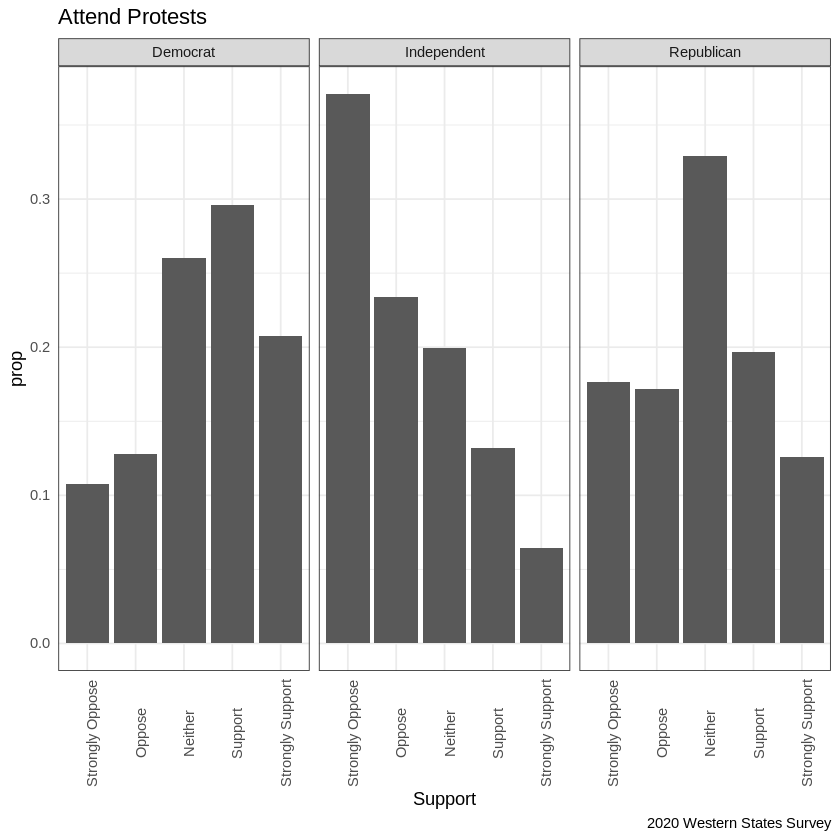

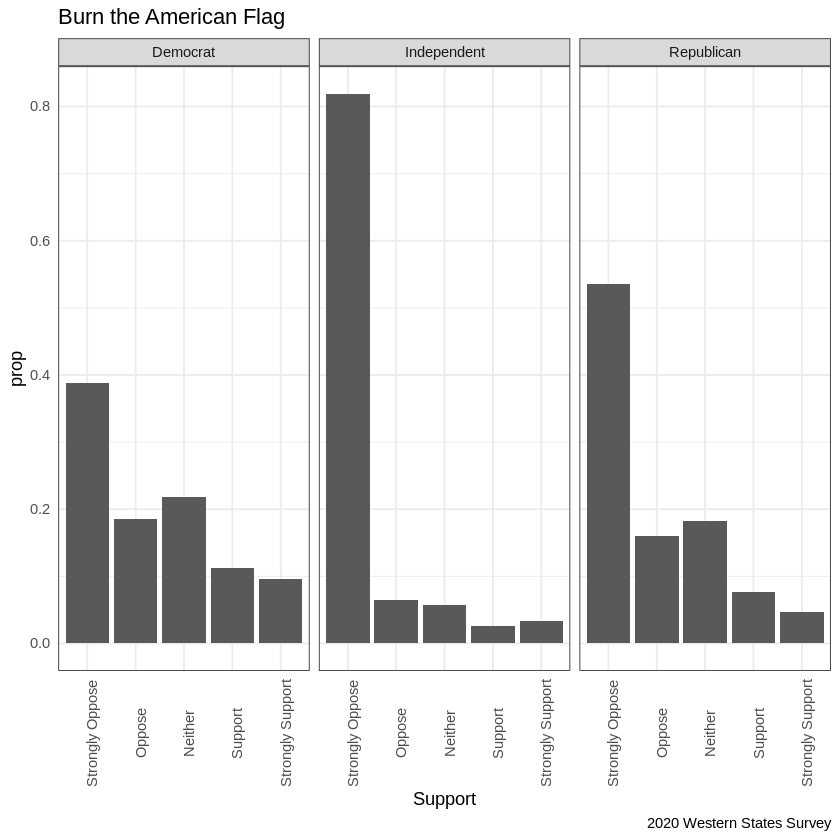

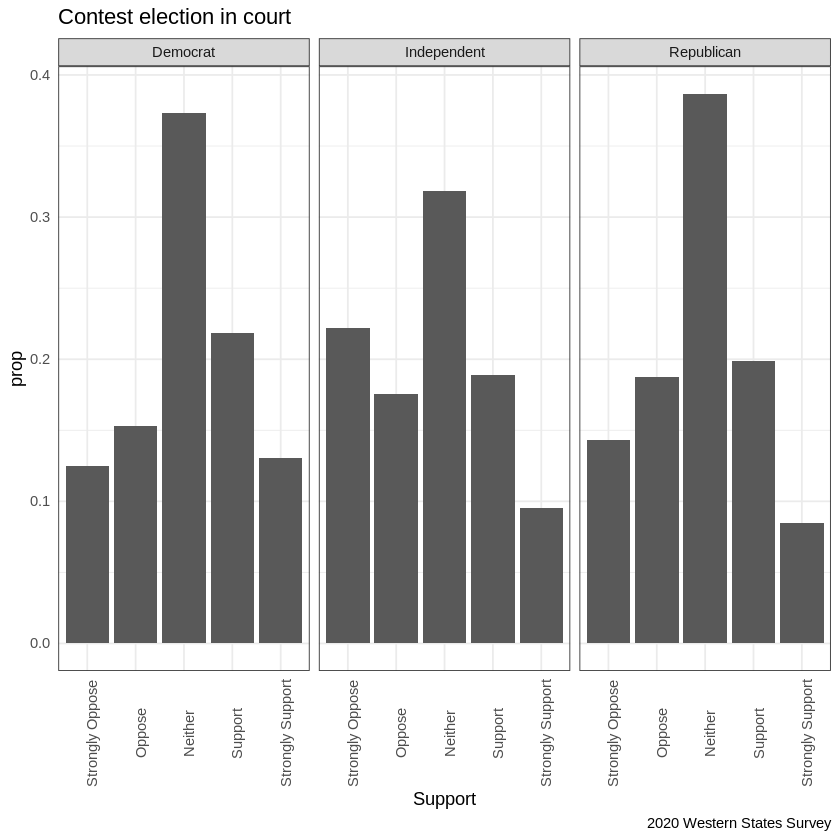

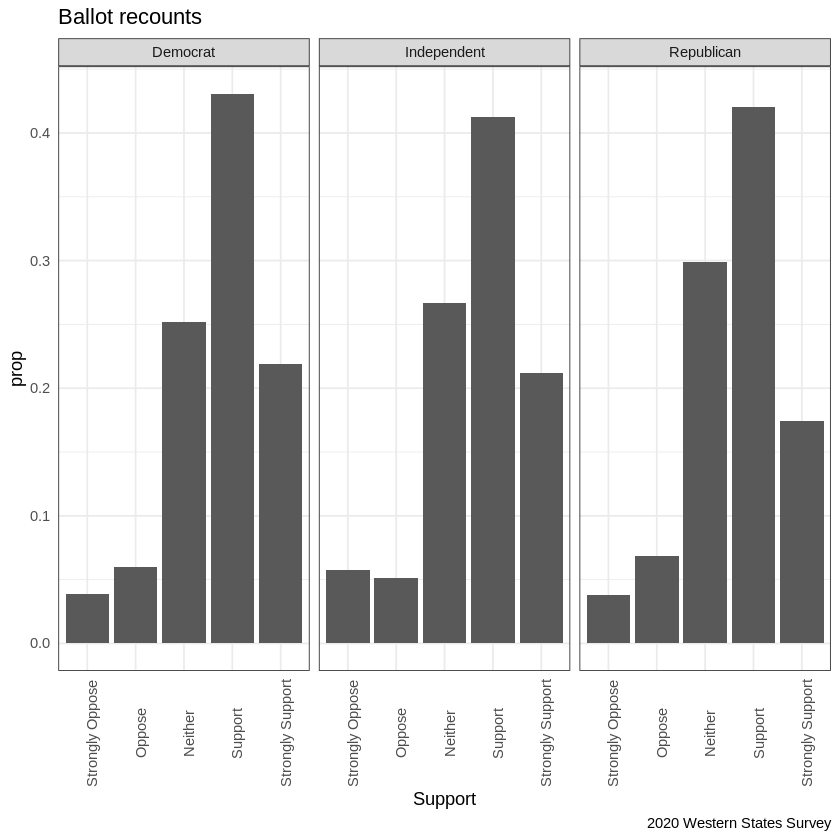

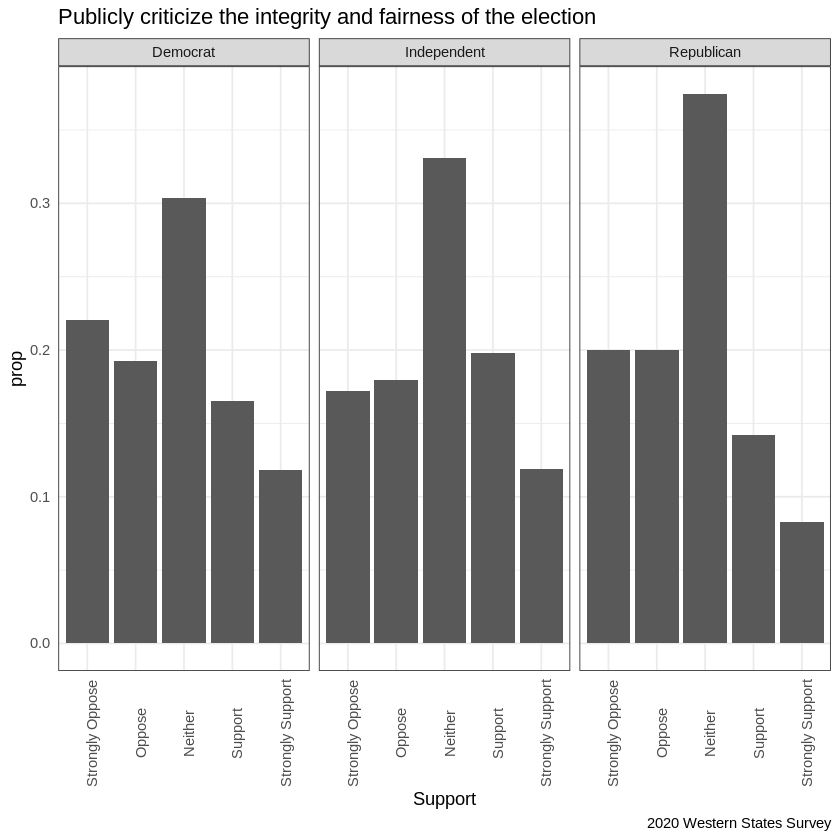

In [ ]:
### 
library(MASS)
library(ggplot2)

names = c("violent", "burn", "court", "recount", "criticize", "pid3")
dat= df[names(df) %in% names] %>% na.omit 
labs <- c("Strongly Oppose", "Oppose", "Neither", "Support", "Strongly Support")

### When unhappy the election results.......

a <- ggplot(dat, aes(x=violent)) +
    facet_grid(~pid3) + 
    geom_bar(mapping = aes(y=..prop..)) + 
    scale_x_discrete("Support", limits = factor(c(1:5)), labels = labs) + 
    scale_fill_grey() +
    theme_bw() + 
    theme(legend.position="none", axis.ticks = element_blank(), axis.text.x = element_text(angle = 90)) + 
    ggtitle("Attend Protests") +
    labs(caption="2020 Western States Survey")

b <- ggplot(dat, aes(x=burn)) +
    facet_grid(~pid3) + 
    geom_bar(mapping = aes(y=..prop..)) + 
    scale_x_discrete("Support", limits = factor(c(1:5)), labels = labs) + 
    scale_fill_grey() +
    theme_bw() + 
    theme(legend.position="none", axis.ticks = element_blank(), axis.text.x = element_text(angle = 90)) + 
    ggtitle("Burn the American Flag") +
    labs(caption="2020 Western States Survey")

c <- ggplot(dat, aes(x=court)) +
    facet_grid(~pid3) + 
    geom_bar(mapping = aes(y=..prop..)) + 
    scale_x_discrete("Support", limits = factor(c(1:5)), labels = labs) + 
    scale_fill_grey() +
    theme_bw() + 
    theme(legend.position="none", axis.ticks = element_blank(), axis.text.x = element_text(angle = 90)) + 
    ggtitle("Contest election in court") +
    labs(caption="2020 Western States Survey")


d <- ggplot(dat, aes(x=recount)) +
    facet_grid(~pid3) + 
    geom_bar(mapping = aes(y=..prop..)) + 
    scale_x_discrete("Support", limits = factor(c(1:5)), labels = labs) + 
    scale_fill_grey() +
    theme_bw() + 
    theme(legend.position="none", axis.ticks = element_blank(), axis.text.x = element_text(angle = 90)) + 
    ggtitle("Ballot recounts") +
    labs(caption="2020 Western States Survey")


e <- ggplot(dat, aes(x=criticize)) +
    facet_grid(~pid3) + 
    geom_bar(mapping = aes(y=..prop..)) + 
    scale_x_discrete("Support", limits = factor(c(1:5)), labels = labs) + 
    scale_fill_grey() +
    theme_bw() + 
    theme(legend.position="none", axis.ticks = element_blank(), axis.text.x = element_text(angle = 90)) + 
    ggtitle("Publicly criticize the integrity and fairness of the election") +
    labs(caption="2020 Western States Survey")

#ggarrange(a,b, c, d, e, ncol=)
a
b
c
d
e

There are clear partisan differences, the exception being criticizing election integrity. On the whole, Democrats are more supportive of contestation actions. Here are a fuller set of results -- just ordered logits with a bunch of predictors. It's interesting, but also confusing. Conservatives are generally more opposed than liberals; authoritarians are opposed to these actions relative to non-authoritarians. Dominance orientation pretty consistently leads to these actions.




In [ ]:
dat = df
polr(as.factor(violent) ~ as.factor(pid3) + sdo + authoritarianism + rr + age + female + white + latino + black + college + ideology , dat) %>% summary()
polr(as.factor(burn) ~ as.factor(pid3) + sdo + authoritarianism + rr + age + female + white + latino + black + college + ideology , dat) %>% summary()
polr(as.factor(court) ~ as.factor(pid3) + sdo + authoritarianism + rr + age + female + white + latino + black + college + ideology , dat) %>% summary()
polr(as.factor(recount) ~ as.factor(pid3) + sdo + authoritarianism + rr + age + female + white + latino + black + college + ideology , dat) %>% summary()
polr(as.factor(criticize) ~ as.factor(pid3) + sdo + authoritarianism + rr + age + female + white + latino + black + college + ideology , dat) %>% summary()



Re-fitting to get Hessian




Call:
polr(formula = as.factor(violent) ~ as.factor(pid3) + sdo + authoritarianism + 
    rr + age + female + white + latino + black + college + ideology, 
    data = dat)

Coefficients:
                              Value Std. Error t value
as.factor(pid3)Independent -0.75508   0.097268  -7.763
as.factor(pid3)Republican  -0.40254   0.079002  -5.095
sdo                        -0.27730   0.242279  -1.145
authoritarianism           -1.09847   0.105521 -10.410
rr                          1.33367   0.279109   4.778
age                        -0.02058   0.001971 -10.441
female                     -0.18544   0.065667  -2.824
white                      -0.14662   0.129477  -1.132
latino                     -0.24386   0.133592  -1.825
black                       0.25355   0.207904   1.220
college                     0.10671   0.067628   1.578
ideology                   -0.30473   0.029156 -10.452

Intercepts:
    Value    Std. Error t value 
1|2  -4.0617   0.2582   -15.7328
2|3  -3.0467   0.25


Re-fitting to get Hessian




Call:
polr(formula = as.factor(burn) ~ as.factor(pid3) + sdo + authoritarianism + 
    rr + age + female + white + latino + black + college + ideology, 
    data = dat)

Coefficients:
                               Value Std. Error   t value
as.factor(pid3)Independent -0.952990   0.120261  -7.92434
as.factor(pid3)Republican  -0.317524   0.084766  -3.74587
sdo                        -0.840594   0.283517  -2.96489
authoritarianism           -1.334330   0.122334 -10.90725
rr                          1.878114   0.330226   5.68737
age                        -0.029823   0.002293 -13.00761
female                     -0.364376   0.074825  -4.86969
white                      -0.039547   0.143762  -0.27509
latino                     -0.112658   0.147962  -0.76140
black                       0.371253   0.228136   1.62733
college                     0.001109   0.077059   0.01439
ideology                   -0.363478   0.033960 -10.70301

Intercepts:
    Value    Std. Error t value 
1|2  -2.9511   0


Re-fitting to get Hessian




Call:
polr(formula = as.factor(court) ~ as.factor(pid3) + sdo + authoritarianism + 
    rr + age + female + white + latino + black + college + ideology, 
    data = dat)

Coefficients:
                               Value Std. Error t value
as.factor(pid3)Independent -0.044532   0.096406 -0.4619
as.factor(pid3)Republican  -0.149521   0.079075 -1.8909
sdo                         0.127558   0.242429  0.5262
authoritarianism           -0.621868   0.103651 -5.9996
rr                          1.077854   0.278950  3.8640
age                        -0.012582   0.001946 -6.4662
female                     -0.046038   0.065400 -0.7039
white                      -0.057093   0.126950 -0.4497
latino                     -0.144641   0.131041 -1.1038
black                       0.148975   0.205025  0.7266
college                    -0.008892   0.067139 -0.1324
ideology                   -0.122598   0.028878 -4.2453

Intercepts:
    Value    Std. Error t value 
1|2  -2.5094   0.2494   -10.0631
2|3  -1.


Re-fitting to get Hessian




Call:
polr(formula = as.factor(recount) ~ as.factor(pid3) + sdo + authoritarianism + 
    rr + age + female + white + latino + black + college + ideology, 
    data = dat)

Coefficients:
                               Value Std. Error  t value
as.factor(pid3)Independent  0.110379   0.099029  1.11462
as.factor(pid3)Republican  -0.141957   0.081025 -1.75202
sdo                         0.850279   0.246986  3.44263
authoritarianism           -0.376151   0.106600 -3.52863
rr                          0.803697   0.287542  2.79506
age                         0.002901   0.001968  1.47398
female                      0.078186   0.066715  1.17194
white                      -0.007825   0.130779 -0.05983
latino                     -0.249266   0.136249 -1.82949
black                      -0.375348   0.215302 -1.74336
college                     0.073975   0.068270  1.08357
ideology                   -0.124617   0.030086 -4.14198

Intercepts:
    Value   Std. Error t value
1|2 -2.6501  0.2654    -9.98


Re-fitting to get Hessian




Call:
polr(formula = as.factor(criticize) ~ as.factor(pid3) + sdo + 
    authoritarianism + rr + age + female + white + latino + black + 
    college + ideology, data = dat)

Coefficients:
                              Value Std. Error  t value
as.factor(pid3)Independent  0.31942   0.096068  3.32498
as.factor(pid3)Republican  -0.05194   0.079061 -0.65693
sdo                         0.51708   0.240256  2.15218
authoritarianism           -0.03376   0.103316 -0.32678
rr                          1.42709   0.278257  5.12867
age                        -0.01149   0.001928 -5.95990
female                     -0.14230   0.065121 -2.18515
white                      -0.23490   0.128008 -1.83504
latino                     -0.06240   0.132619 -0.47052
black                      -0.01175   0.206154 -0.05699
college                    -0.21435   0.067171 -3.19109
ideology                    0.03505   0.028816  1.21623

Intercepts:
    Value   Std. Error t value
1|2 -1.0620  0.2489    -4.2672
2|3 -0.0

In [ ]:
# I'm working on this: 

## Interactive treatment effects....
data <- df

data$treat <- car::recode(data$VIOLENT, "1 = 'Violent'; 0 = 'Unspecified'") %>% as.factor
data$pid3 <- data$pid3 %>% as.ordered() 
data$college <- data$college %>% as.factor() 
data$white <- data$white %>% as.factor() 
data$post_election <- data$post_election %>% as.factor() 
data$timing <- data$timing %>% as.ordered() 
data$voted <- data$voted %>% as.ordered() 

fit3 <- CausalANOVA(formula=violent ~ college + treat + white, 
                    int2.formula = ~ treat:college, data=data,  
                    nway=2, family="gaussian")
summary(fit3)
plot(fit3, type="AMIE", fac.name=c("treat", "college", "white"),space=25,adj.p=2.2)





ERROR: ignored